<h1>Decision trees</h1>

Notebook Goals

* Learn how to create a decision tree model using scikit-learn
* Learn how to tune a model

<h2> What are decision trees?</h2> 

A relatively interpretable machine learning algorithm which you can think of as a series of questions designed to assign a class or predict a continuous value depending on the task. This is unlike linear regression which is almost always used for regression.

![image](images/decisionTreeExample.png)

<h2> Import Libraries</h2>

In [23]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree.export import export_text
from sklearn import tree

## Load the Dataset
The Iris dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. The code below loads the iris dataset.

In [24]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<h2>  Remove Missing or Impute Values </h2>
If you want to build models with your data, null values are (almost) never allowed. It is important to always see how many samples have missing values and for which columns.

In [25]:
# Look at the shape of the dataframe
df.shape

(150, 5)

In [26]:
# There is a missing value in the Length column which is a feature
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

<h2> Arrange Data into Features Matrix and Target Vector </h2>
Target is flower species

In [27]:
feature_names = data.feature_names

X = df.loc[:, feature_names].values

y = df.loc[:, 'target'].values

<h2> Train Test Split </h2>

![images](images/trainTestSplit.png)
The colors in the image indicate which variable (X_train, X_test, Y_train, Y_test) the data from the dataframe df went to for a particular train test split (not necessarily the exact split of the code below).

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

<h2>Decision trees for classification</h2>

<b>Step 1:</b> Import the model you want to use

In sklearn, all machine learning models are implemented as Python classes

In [1]:
# This was already imported earlier in the notebook so commenting out
#from sklearn.tree import DecisionTreeClassifier

<b>Step 2:</b> Make an instance of the Model

This is a place where we can tune the hyperparameters of a model. The code below constrains the model to have at most a depth of 2. Tree depth is a measure of how many splits it makes before coming to a prediction.

![images](images/max_depth_not_depth.png)

In [30]:
clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)

<b>Step 3:</b> Training the model on the data, storing the information learned from the data

Model is learning the relationship between x and y

In [31]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

<b>Step 4:</b> Predict the values of new data. Uses the information the model learned during the model training process

Predict for One Observation

In [32]:
# Predict for One Observation
clf.predict(X_test[0].reshape(1, -1))

array([0])

Predict for Multiple Observations at Once

In [33]:
clf.predict(X_train[0:10])

array([1, 2, 1, 1, 2, 1, 0, 1, 0, 1])

<h2> Measuring Model Performance</h2> 

While there are other ways of measuring model performance (precision, recall, F1 Score, [ROC Curve](https://towardsdatascience.com/receiver-operating-characteristic-curves-demystified-in-python-bd531a4364d0), etc), we are going to keep this simple and use accuracy as our metric. 
To do this are going to see how the model performs on new data (test set)

Accuracy is defined as:
(fraction of correct predictions): correct predictions / total number of data points

In [34]:
score = clf.score(X_test, y_test)
print(score)

0.9473684210526315


## Finding the Optimal `max_depth`

In [35]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 6))

# List to store the average RMSE for each value of max_depth:
accuracy = []

for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X_train, y_train)

    score = clf.score(X_test, y_test)
    accuracy.append(score)

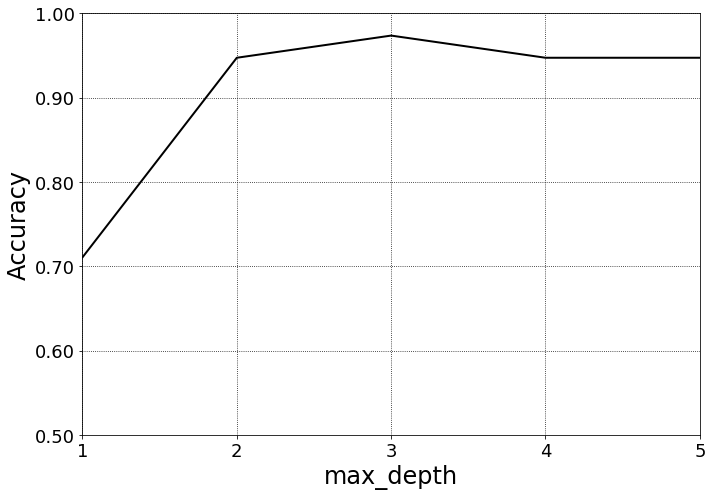

In [36]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));

ax.plot(max_depth_range,
        accuracy,
        lw=2,
        color='k')

ax.set_xlim([1, 5])
ax.set_ylim([.50, 1.00])
ax.grid(True,
        axis = 'both',
        zorder = 0,
        linestyle = ':',
        color = 'k')

yticks = ax.get_yticks()

y_ticklist = []
for tick in yticks:
    y_ticklist.append(str(tick).ljust(4, '0')[0:4])
ax.set_yticklabels(y_ticklist)
ax.tick_params(labelsize = 18)
ax.set_xticks([1,2,3,4,5])
ax.set_xlabel('max_depth', fontsize = 24)
ax.set_ylabel('Accuracy', fontsize = 24)
fig.tight_layout()
#fig.savefig('images/max_depth_vs_accuracy.png', dpi = 300)

<h2> Feature Importance </h2>
One advantage of classification trees is that they are relatively easy to interpret. Classification trees in scikit-learn allow you to calculate feature importance which is the total amount that gini index or entropy decrease due to splits over a given feature. Scikit-learn outputs a number between 0 and 1 for each feature. All feature importances are normalized to sum to 1. The code below shows feature importances for each feature in a decision tree model.


In [43]:
importances = pd.DataFrame({'feature': feature_names,'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
3,petal width (cm),0.919
2,petal length (cm),0.063
1,sepal width (cm),0.018
0,sepal length (cm),0.000


If a feature has a low feature importance value, it doesnt necessarily mean that the feature isnt important for prediction, it just means that the particular feature wasnt chosen at a particularly early level of the tree. Could be that the feature could be identical or highly correlated with another informative feature. Feature importance values dont tell you which class they are very predictive for or relationships between features which may influence prediction

<h2>Decision Path</h2>
You can extract the rules from a decision tree using export_text. There are other ways to do this which you can read about <a href="https://stackoverflow.com/questions/20224526/how-to-extract-the-decision-rules-from-scikit-learn-decision-tree">here</a>.

In [15]:
print(export_text(clf, feature_names=feature_names))

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.65
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- class: 1
|   |--- petal width (cm) >  1.65
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



## Common questions

<h3>How do you create a visualization based on a decision tree? </h3>
You can visualize decision trees using matplotlib, graphviz, or an online converter. You can read how to do it <a href="https://towardsdatascience.com/visualizing-decision-trees-with-python-scikit-learn-graphviz-matplotlib-1c50b4aa68dc">here</a> (or use the notebook VisualizeDecisionTrees.ipynb to learn how to do it using matplotlib) In this example notice that petal width is the topmost split. It also happens to be the "most important" feature. 

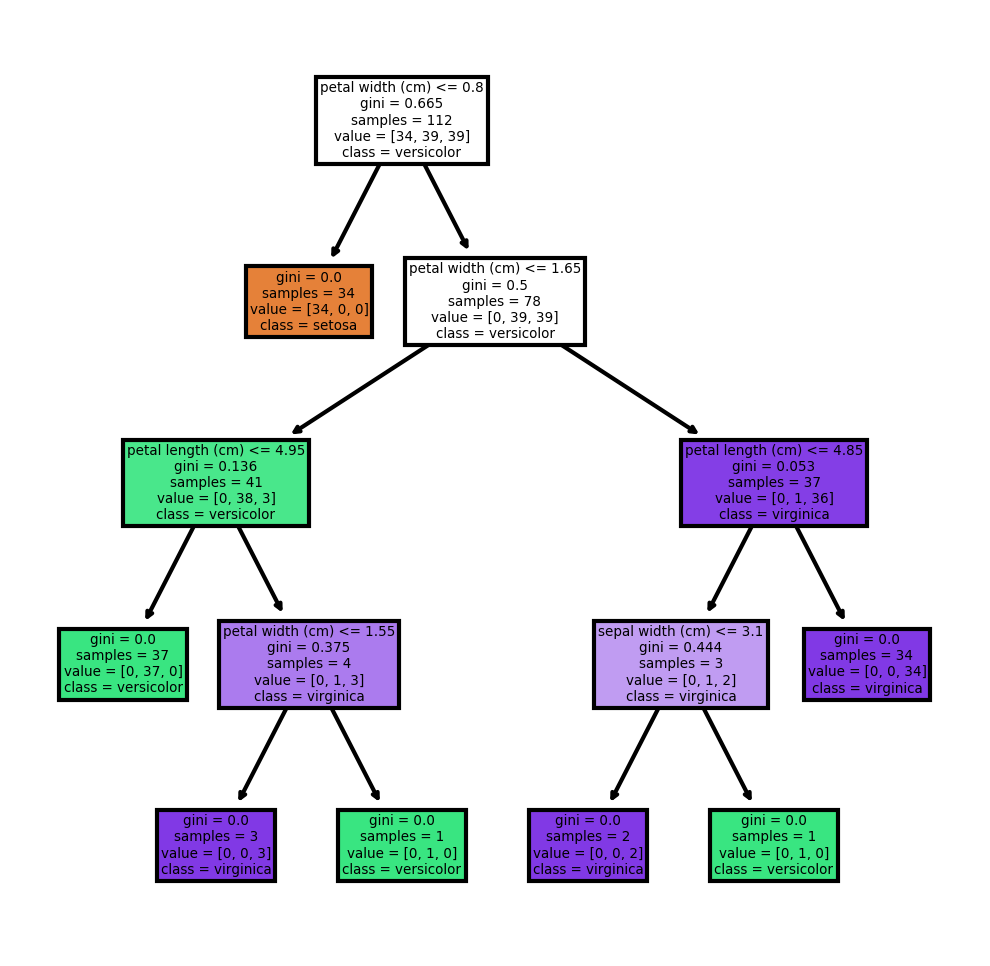

In [37]:
# Matplotlib
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);

<h3>How do you find the depth </h3>

If you ever wonder what the depth of your trained decision tree is, you can use the get_depth method.

In [38]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 10))

# List to store the average RMSE for each value of max_depth:
accuracy = []

for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X_train, y_train)
    print('Max Depth: ' + str(depth) +', Depth: ' + str(clf.get_depth()))

    score = clf.score(X_test, y_test)
    accuracy.append(score)

Max Depth: 1, Depth: 1
Max Depth: 2, Depth: 2
Max Depth: 3, Depth: 3
Max Depth: 4, Depth: 4
Max Depth: 5, Depth: 4
Max Depth: 6, Depth: 4
Max Depth: 7, Depth: 4
Max Depth: 8, Depth: 4
Max Depth: 9, Depth: 4


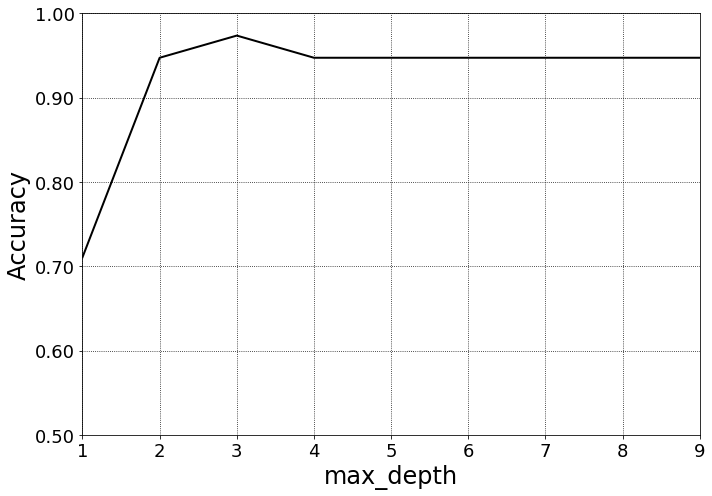

In [39]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));

ax.plot(max_depth_range,
        accuracy,
        lw=2,
        color='k')

ax.set_xlim([1, 9])
ax.set_ylim([.50, 1.00])
ax.grid(True,
        axis = 'both',
        zorder = 0,
        linestyle = ':',
        color = 'k')

yticks = ax.get_yticks()

y_ticklist = []
for tick in yticks:
    y_ticklist.append(str(tick).ljust(4, '0')[0:4])
ax.set_yticklabels(y_ticklist)
ax.tick_params(labelsize = 18)
ax.set_xticks([1,2,3,4,5, 6, 7, 8, 9])
ax.set_xlabel('max_depth', fontsize = 24)
ax.set_ylabel('Accuracy', fontsize = 24)
fig.tight_layout()
#fig.savefig('images/max_depth_vs_accuracy.png', dpi = 300)

<h3>Hyperparameters versus parameters </h3>

There is an excellent article on it here <a href="https://sebastianraschka.com/blog/2016/model-evaluation-selection-part3.html">here</a> by Sebastian Raschka

Before we fit the classification tree, we specified max_depth. This is a hyperparameter before we specified this before model fitting. You could also have specified the selection criterion (Gini index, entropy, etc), min_samples_leaf, and max_leaf_nodes. 

The parameters of the model after fitting are a parameter like the depth of the model. Additionally, you can get the number of leaf nodes for a trained decision tree by using the get_n_leaves method.